In [1]:
from importlib.machinery import SourceFileLoader
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

wr = SourceFileLoader("mobius", r"../mobius.py").load_module()
cu = SourceFileLoader("mobius_calib_uncert_lmfit", r"../mobius_calib_uncert_lmfit.py").load_module()

In [2]:
wr.initialize("../../Applications/eDNA/edna.dll")

In [3]:
ds = wr.DataSet.setup_with_blank_index_sets("input_template.dat")

In [4]:
species = ["Test"]
ds.set_indexes("Fish species", species)

In [5]:
n_reaches = 100

reaches = []
for i in range(n_reaches) :
    prev = []
    if i > 0 :
        prev = [str(i-1)]
    pair = [str(i), prev]
    reaches.append(pair)

ds.set_branch_indexes("Reach", reaches)

In [6]:
ds.read_parameters("templatepars.dat")   # Reads just (some) parameters, not index sets

In [7]:
ts = 2*3600
#print("input time steps are %d" % ts)
fls = .5

scale = fls + fls*np.arange(0, n_reaches, 1/float(n_reaches))
vol = 5e4*np.ones(ts)
flow = 2*np.ones(ts)
for i in range(n_reaches) :
    ds.set_input_series("Reach volume", [str(i)], vol*scale[i])
    ds.set_input_series("Reach flow",   [str(i)], flow*scale[i])

In [8]:
dists = np.arange(0, 2000, 20)
for i in range(100) :
    ds.set_parameter_double("Distance from outlet", [str(i)], dists[99-i])

In [9]:
for sp in species :
    ds.set_parameter_double("Biomass at outlet", [sp], 100)
    #ds.set_parameter_double("Biomass distribution linear coeff", [sp], 0.02)
    ds.set_parameter_double("Biomass distribution exponential coeff", [sp], 0.002)

In [10]:
ds.set_parameter_double("eDNA shedding rate per fish biomass", [], 0.1)
ds.set_parameter_double("eDNA decay rate", [], 0.01)

In [11]:
ds.run_model()

True

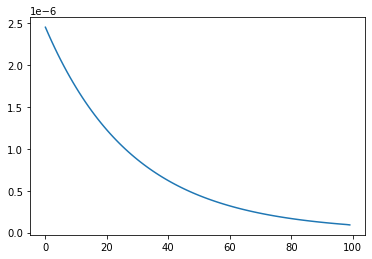

In [12]:
ts = ds.get_last_timesteps()
sp = species[0]
res = np.zeros(n_reaches)
for i in range(n_reaches) :
    res[99-i] = ds.get_result_series("eDNA concentration", [sp, str(i)])[ts-1]
    #res[99-i] = ds.get_result_series("Fish biomass", [sp, str(i)])[ts-1]
    #res[99-i] = ds.get_result_series("eDNA mass", [sp, str(i)])[ts-1]
plt.plot(res)